## Multiple Linear Regression:--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


### Here some columns are unnecesory. better to drop them.

In [3]:
df.drop(['Unnamed: 0','year','month'],axis=1,inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


### Checking null values:-

In [7]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [8]:
import seaborn as sns

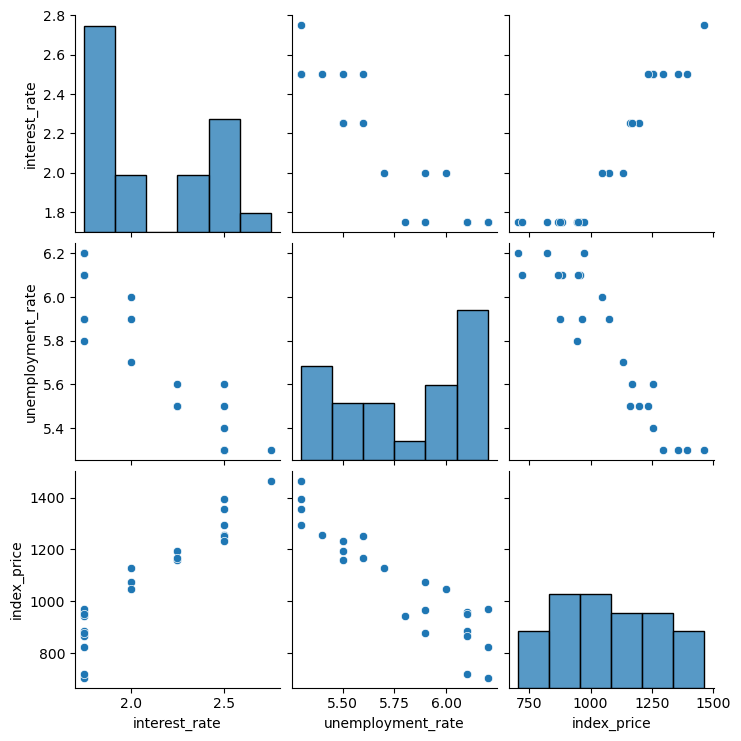

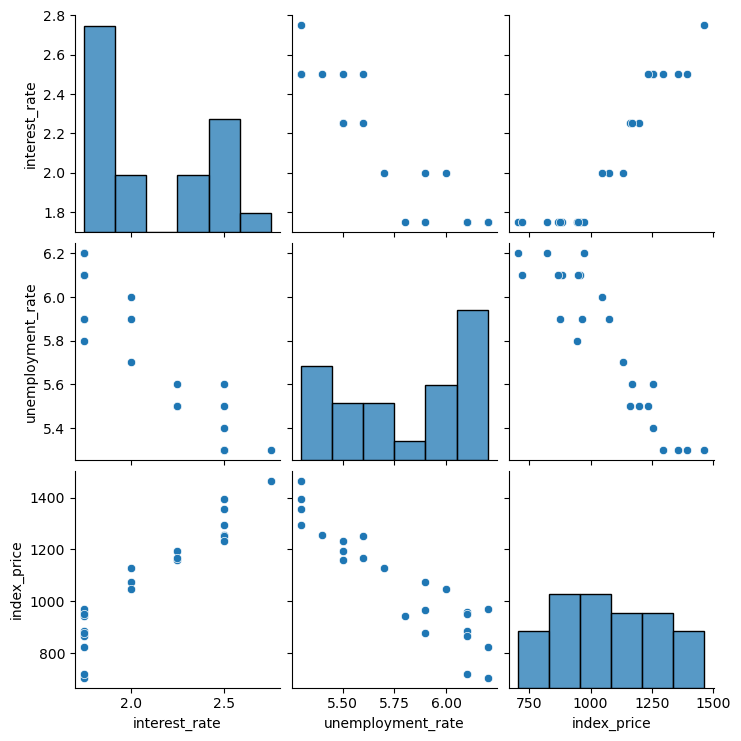

In [10]:
sns.pairplot(df)
plt.show()

#### Here in above plot we got some negative linear regression. or inverse relationship

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


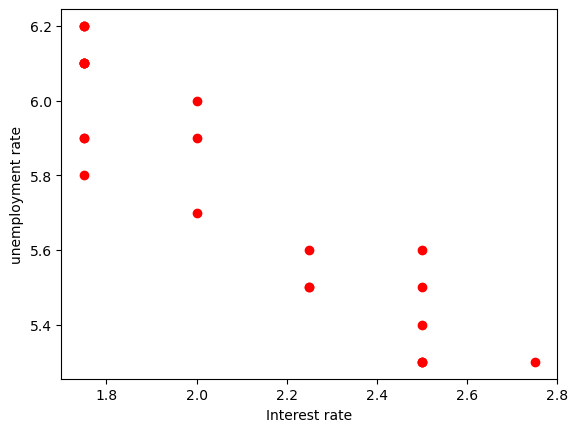

In [15]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')
plt.xlabel('Interest rate')
plt.ylabel('unemployment rate')
plt.show()

### Indepedent and dependent features:

In [17]:
X = df.iloc[:,:-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [24]:
y = df.iloc[:,[-1]]     #for -1 brackets are used. it shows column name also. without this bracket it wont. 
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


### Train Test split:-

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [29]:
sns.__version__

'0.13.2'

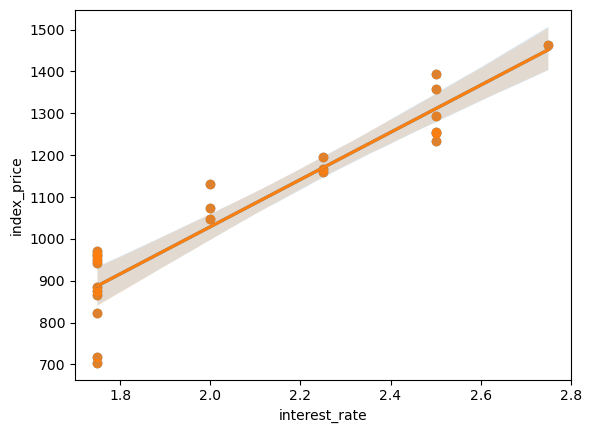

In [31]:
sns.regplot(x= df['interest_rate'],y= df['index_price'])
plt.show()

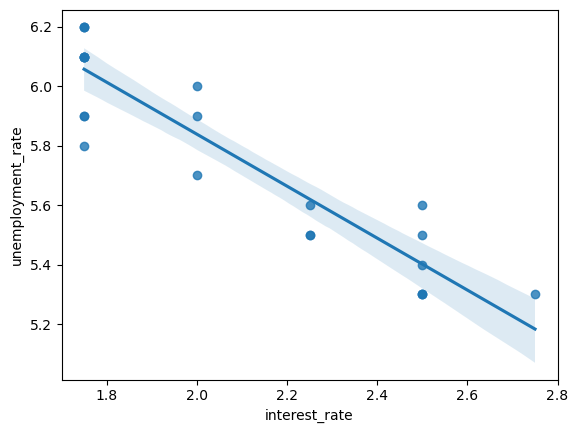

In [32]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])
plt.show()

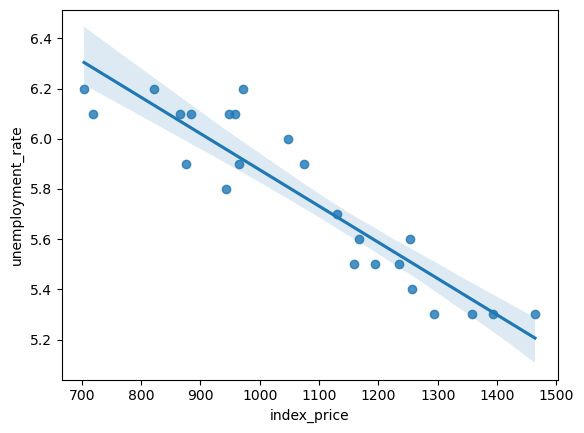

In [33]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])
plt.show()

### Standard Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regression = LinearRegression()

In [39]:
regression.fit(X_train,y_train)

LinearRegression()

In [40]:
from sklearn.model_selection import cross_val_score


In [41]:
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [43]:
validation_score     #we get 3 MSE values and that are negative.

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

### To find average of MSE values:

In [44]:
np.mean(validation_score)

np.float64(-5914.828180162388)

### Predictions:--

In [45]:
y_pred = regression.predict(X_test)

In [46]:
y_pred

array([[1180.7466813 ],
       [ 802.74279699],
       [1379.83457045],
       [ 838.52599602],
       [ 973.85313963],
       [1144.96348227]])

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [48]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'Mean squared error: {mse}')
print(f'Mean absolute error: {mae}')
print(f'Root Mean squared error: {rmse}')

Mean squared error: 8108.567426306604
Mean absolute error: 73.80444932337097
Root Mean squared error: 90.04758423359621


### R square 
Formula

**R^2 = 1 - (SSR/SST)**


R^2	=	coefficient of determination  
SSR	=	sum of squares of residuals  
SST	=	total sum of squares

In [49]:
from sklearn.metrics import r2_score

In [51]:
score = r2_score(y_test,y_pred)
print(f'R2 score: {score}')

R2 score: 0.7591371539010257


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model  
n: The number of observations  
k: The number of predictor variables

In [52]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

### Assumptions:-

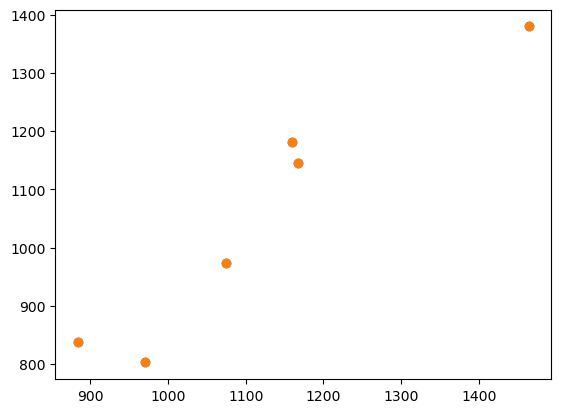

In [54]:
plt.scatter(y_test,y_pred)
plt.show()

#### It looks like there is some relationship between y_train and y_pred. so our model performing well here. 